<a href="https://colab.research.google.com/github/Soubhagyabehera/CNN/blob/master/image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) =mnist.load_data() # x_train=images, y_train=labels

11493376/11490434 [==============================] - 0s 0us/step


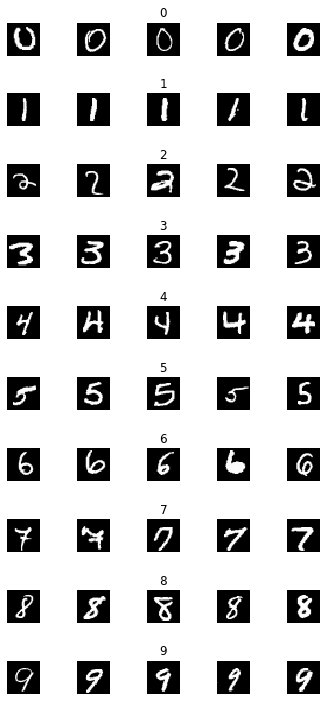

In [3]:
num_of_samples=[]
cols=5
num_classes=10

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    
    image=x_selected[random.randint(0,(len(x_selected)-1)),:,:]
    axs[j][i].imshow(image,cmap='gray')
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))
      


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


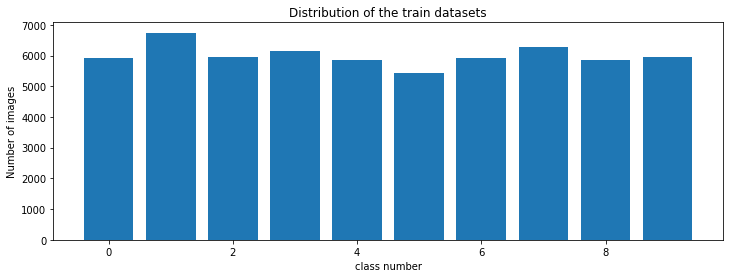

In [4]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the train datasets")
plt.xlabel("class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

x_train=x_train/255
x_test=x_test/255


In [6]:
#define the lenet model function

#def lenet_model():
  model=Sequential()
  model.add(Conv2D(16,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  model.summary()
#lenet_model()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_2 (Dense)              (None, 10)         

In [7]:
h=model.fit(x_train,y_train,epochs=10,verbose=1,validation_data=(x_test,y_test),batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 16s 275us/step - loss: 0.1423 - acc: 0.9568 - val_loss: 0.0688 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0532 - acc: 0.9838 - val_loss: 0.0488 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0495 - acc: 0.9857 - val_loss: 0.0546 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0483 - acc: 0.9859 - val_loss: 0.0703 - val_acc: 0.9815
Epoch 5/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0364 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0393 - acc: 0.9889 - val_loss: 0.0652 - val_acc: 0.9815
Epoch 7/10
60000/60000 [